<b><font size="5">Data importation and integration & Exploration</font><a class="anchor"><a id='toc'></a></b>

In [1]:
# Import relevant libraries
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Import dataset WineMatters and save in variable wm
wm = pd.read_csv(r'data\WineMatters.csv')

In [3]:
# Set WineID as index and show dataset
wm.set_index('WineID', inplace = True)

In [4]:
# Show dataset
wm.head()

,Aging_Time,Litters_Barrel,Type,Magnesium,Residual_Sugar,Sulphites,Barrel,Grapes,Acidity,Floral,...,Red_Fruit,Citric,Density,Color_Intensity,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal
WineID,,,,,,,,,,,,,,,,,,,,,
1,65,265,White,0,0.0,Not Present,Aluminium,Single,0,5,...,2,4,2,3,3,0,0,6,6,4
2,47,2464,Red,310,305.0,Present,Aluminium,Single,4,2,...,0,2,2,3,4,0,0,8,6,4
3,15,2138,White,0,0.0,Not Present,Aluminium,Single,3,4,...,2,0,2,2,3,0,0,8,8,4
4,60,623,White,0,0.0,Not Present,Aluminium,Single,0,4,...,3,4,3,1,1,0,0,2,2,6
5,70,354,White,0,0.0,Not Present,Aluminium,Single,0,4,...,4,3,4,2,2,0,0,4,4,10


<b><font size="5">Data Exploration</font><a class="anchor"><a id='toc'></a></b>

In [5]:
# Check number of rows and columns
wm.shape

(129881, 22)

We can observe that the dataset contains 129881 rows and 22 columns.

In [6]:
# Check column names
wm.columns

Index(['Aging_Time', 'Litters_Barrel', 'Type', 'Magnesium', 'Residual_Sugar',
       'Sulphites', 'Barrel', 'Grapes', 'Acidity', 'Floral', 'Wood',
       'Sweetness', 'Red_Fruit', 'Citric', 'Density', 'Color_Intensity',
       'Cloudiness', 'Alcohol', 'Astringency', 'Satisfaction_France',
       'Satisfaction_Spain', 'Satisfaction_Portugal'],
      dtype='object')

In [7]:
# Check the data type of the variables and the non-missing values for each variable in the dataset
wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129881 entries, 1 to 129880
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Aging_Time             129881 non-null  int64  
 1   Litters_Barrel         129881 non-null  int64  
 2   Type                   129881 non-null  object 
 3   Magnesium              129881 non-null  int64  
 4   Residual_Sugar         129490 non-null  float64
 5   Sulphites              129881 non-null  object 
 6   Barrel                 129825 non-null  object 
 7   Grapes                 129873 non-null  object 
 8   Acidity                129881 non-null  int64  
 9   Floral                 129881 non-null  int64  
 10  Wood                   129881 non-null  int64  
 11  Sweetness              129881 non-null  int64  
 12  Red_Fruit              129881 non-null  int64  
 13  Citric                 129881 non-null  int64  
 14  Density                129881 non-nu

In this dataset, we can verify that we have:

- 1 variables with the type float;
- 18 variables that are integer;
- 4 variables that are objects, which is the same as to say categorical variables.

In [8]:
# Checking and identifying missing values 
wm.isna().sum()

Aging_Time                 0
Litters_Barrel             0
Type                       0
Magnesium                  0
Residual_Sugar           391
Sulphites                  0
Barrel                    56
Grapes                     8
Acidity                    0
Floral                     0
Wood                       0
Sweetness                  0
Red_Fruit                  0
Citric                     0
Density                    0
Color_Intensity            0
Cloudiness                 0
Alcohol                    0
Astringency                0
Satisfaction_France        0
Satisfaction_Spain         0
Satisfaction_Portugal      0
dtype: int64

We  can conclude that we have missing values on some of the variables, namely:
- Residual_Sugar (391 missing values)
- Barrel (56 missing value);
- Grapes (8 missing values)

In [9]:
# Get descriptive statistics for the numerical data
wm.describe()

,Aging_Time,Litters_Barrel,Magnesium,Residual_Sugar,Acidity,Floral,Wood,Sweetness,Red_Fruit,Citric,Density,Color_Intensity,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal
count,129881.000000,129881.000000,129881.000000,129490.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000
mean,39.427907,1981.419854,14.713599,15.090779,3.485914,3.340820,2.851972,2.990422,3.249113,3.383451,3.519683,3.472086,3.466743,2.838575,2.990653,7.391351,7.411523,6.705138
std,15.119312,1027.119025,38.071002,38.465273,1.292228,1.260586,1.443746,1.305965,1.318827,1.346087,1.306524,1.305573,1.273503,1.393000,1.527221,2.312959,2.303540,2.597452
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,27.000000,1359.000000,0.000000,0.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,6.000000,6.000000,4.000000
50%,40.000000,1925.000000,0.000000,0.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,8.000000,8.000000,8.000000
75%,51.000000,2544.000000,12.000000,13.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,10.000000,10.000000,8.000000
max,85.000000,6951.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,10.000000,10.000000,10.000000


For example, we could observe that the average aging time is about 39 years.

In [10]:
# Get descriptive statistics for the categorical data
wm.describe(include = ['O'])

,Type,Sulphites,Barrel,Grapes
count,129881,129881,129825,129873
unique,2,4,2,2
top,White,Present,Aluminium,Mixed
freq,65900,62160,106045,89685


<b><font size="3">Frequency of each level in categorical variables</font><a class="anchor"><a id='toc'></a></b>

In [11]:
# Check the frequency of each level in categorical variable Type
wm['Type'].value_counts()

White    65900
Red      63981
Name: Type, dtype: int64

In [12]:
# Check the frequency of each level in categorical variable Barrel
wm['Barrel'].value_counts()

Aluminium    106045
Wooden        23780
Name: Barrel, dtype: int64

In [13]:
# Check the frequency of each level in categorical variable Grapes
wm['Grapes'].value_counts()

Mixed     89685
Single    40188
Name: Grapes, dtype: int64

In [14]:
# Check the frequency of each level in categorical variable Sulphites
wm['Sulphites'].value_counts()

Present        62160
Not Present    58305
Very Few        9412
0                  4
Name: Sulphites, dtype: int64

In Sulphites there are the values Not Present and 0 which should be the same. In a further step they will get joined together.

<b><font size="3">Mean value of satisfaction per country by type of wine</font><a class="anchor"><a id='toc'></a></b>

In [15]:
# Mean value of satisfaction in France by type of wine 
wm.groupby('Type')['Satisfaction_France'].mean()

Type
Red      7.351307
White    7.430228
Name: Satisfaction_France, dtype: float64

In [16]:
# Mean value of satisfaction in Spain by type of wine 
wm.groupby('Type')['Satisfaction_Spain'].mean()

Type
Red      7.376346
White    7.445675
Name: Satisfaction_Spain, dtype: float64

In [17]:
# Mean value of satisfaction in Portugal by type of wine 
wm.groupby('Type')['Satisfaction_Portugal'].mean()

Type
Red      6.580297
White    6.826343
Name: Satisfaction_Portugal, dtype: float64

The satisfaction level has a scale from 0 to 10. In general, white wine has a better satisfaction level in all countries than red wine. While France and Spain are similar in their satisfaction level (around 7.35 for red wine and 7.44 for white wine), the satisfaction level of Portugal is lower (around 6.6 for red wine and 6.8 for white wine).

<b><font size="3">Visual Exploration</font><a class="anchor"><a id='toc'></a></b>

<AxesSubplot:xlabel='count', ylabel='Alcohol'>

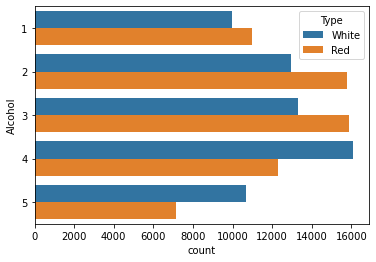

In [18]:
sns.countplot(y = 'Alcohol', hue = 'Type', data = wm,
             order = [1, 2, 3, 4, 5])